# Capstone: Predicting NFL play calls.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [2]:
#reading in data
plays_2020 = pd.read_csv('Data/pbp-2020.csv')

### Data-Cleaning

In [3]:
#selecting only run and pass plays
all_run_pass = plays_2020[(plays_2020['PlayType']=='RUSH') | (plays_2020['PlayType']=='PASS')]

In [4]:
#selecting plays that that had no penalties, challenges, or extra points
all_run_pass = all_run_pass[(all_run_pass['IsChallenge']==0) & (all_run_pass['IsPenalty']==0) & (all_run_pass['IsTwoPointConversion']==0) & (all_run_pass['IsNoPlay']==0)]

In [5]:
#dropping unnecessary columns
all_run_pass.drop(columns=['GameId','Unnamed: 10','Unnamed: 12','TeamWin','Unnamed: 16','Unnamed: 17','SeasonYear','IsIncomplete','IsTouchdown','IsSack','IsChallenge','IsChallengeReversed','Challenger','IsMeasurement','IsInterception','IsFumble','RushDirection','PassType','IsPenalty','IsTwoPointConversion','IsTwoPointConversionSuccessful','IsPenaltyAccepted','PenaltyTeam','IsNoPlay','PenaltyType','PenaltyYards'],inplace=True)

In [6]:
#getting baseline rate for the data
all_run_pass['PlayType'].value_counts(normalize=True)

PASS    0.589554
RUSH    0.410446
Name: PlayType, dtype: float64

In [7]:
#converting target variable from string to numeric
all_run_pass['PlayType'] = [1 if i == 'PASS' else 0 for i in all_run_pass['PlayType']]

## EDA

In [8]:
#creating df for the Rams
LA_2020 = all_run_pass[all_run_pass['OffenseTeam']=='LA']

In [9]:
#looking at play call by down
LA_2020.groupby(by=['Down'])['PlayType'].value_counts()

Down  PlayType
1     0           225
      1           221
2     1           191
      0           137
3     1           152
      0            51
4     0             9
      1             8
Name: PlayType, dtype: int64

In [10]:
#creating a dataframe for the results in order to plot
LA = pd.DataFrame()

In [11]:
LA['Down'] = [1,2,3,4]

In [12]:
LA['Runs'] = [225,137,51,9]

In [13]:
LA['Passes'] = [221,191,152,8]

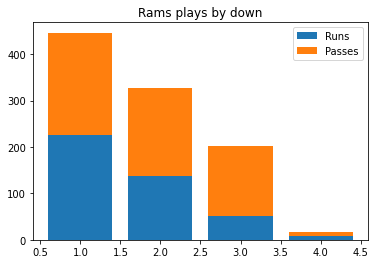

In [14]:
#creating and saving bar chart for Rams plays by down
plt.bar(LA['Down'],LA['Runs'],label='Runs')
plt.bar(LA['Down'],LA['Passes'],bottom=LA['Runs'],label='Passes')
plt.legend()
plt.title('Rams plays by down')
plt.savefig('Rams plays by down')

In [15]:
#repeating above process but for the steelers
PIT_2020 = all_run_pass[all_run_pass['OffenseTeam']=='PIT']

In [16]:
PIT_2020.groupby(by=['Down'])['PlayType'].value_counts()

Down  PlayType
1     1           246
      0           175
2     1           207
      0           118
3     1           176
      0            36
4     1            10
      0             9
Name: PlayType, dtype: int64

In [17]:
PIT = pd.DataFrame()
PIT['Down'] = [1,2,3,4]

In [18]:
PIT['Runs'] = [175,118,36,9]
PIT['Passes'] = [246,207,176,10]

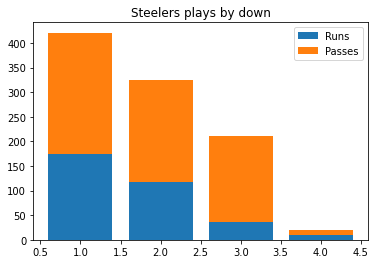

In [19]:
plt.bar(PIT['Down'],PIT['Runs'],label='Runs')
plt.bar(PIT['Down'],PIT['Passes'],bottom=PIT['Runs'],label='Passes')
plt.legend()
plt.title('Steelers plays by down')
plt.savefig('Steelers plays by down')

In [20]:
PIT_2020.groupby(by=['Down'])['PlayType'].value_counts(normalize=True)

Down  PlayType
1     1           0.584323
      0           0.415677
2     1           0.636923
      0           0.363077
3     1           0.830189
      0           0.169811
4     1           0.526316
      0           0.473684
Name: PlayType, dtype: float64

In [21]:
PIT_2020.groupby(by=['Formation'])['PlayType'].value_counts(normalize=True)

Formation          PlayType
NO HUDDLE          0           1.000000
NO HUDDLE SHOTGUN  1           0.875000
                   0           0.125000
SHOTGUN            1           0.746518
                   0           0.253482
UNDER CENTER       0           0.847059
                   1           0.152941
Name: PlayType, dtype: float64

In [22]:
PIT_2020.groupby(by=['Formation'])['PlayType'].value_counts()

Formation          PlayType
NO HUDDLE          0             1
NO HUDDLE SHOTGUN  1            77
                   0            11
SHOTGUN            1           536
                   0           182
UNDER CENTER       0           144
                   1            26
Name: PlayType, dtype: int64

In [23]:
PIT_formations = pd.DataFrame()

In [24]:
PIT_formations['Formation'] = ['No_Huddle','No_Huddle_Shotgun','Shotgun','Under_Center']

In [25]:
PIT_formations['Runs'] = [1,11,182,144]

In [26]:
PIT_formations['Passes'] = [0,77,536,26]

In [27]:
PIT_formations

,Formation,Runs,Passes
0,No_Huddle,1,0
1,No_Huddle_Shotgun,11,77
2,Shotgun,182,536
3,Under_Center,144,26


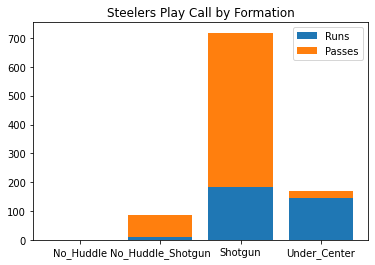

In [28]:
plt.bar(PIT_formations['Formation'],PIT_formations['Runs'],label='Runs')
plt.bar(PIT_formations['Formation'],PIT_formations['Passes'],bottom=PIT_formations['Runs'],label='Passes')
plt.legend()
plt.title('Steelers Play Call by Formation')
plt.savefig('Steelers Play Call by Formation')

In [29]:
ARI_2020 = all_run_pass[all_run_pass['OffenseTeam']=='ARI']

In [30]:
ARI_2020.groupby(by=['Formation'])['PlayType'].value_counts()

Formation          PlayType
NO HUDDLE          0            11
                   1             5
NO HUDDLE SHOTGUN  1           207
                   0           143
SHOTGUN            1           320
                   0           209
UNDER CENTER       0            41
                   1            24
Name: PlayType, dtype: int64

In [31]:
ARI_formations = pd.DataFrame()

In [32]:
ARI_formations['Formation'] = ['No_Huddle','No_Huddle_Shotgun','Shotgun','Under_Center']

In [33]:
ARI_formations['Runs'] = [11,143,209,41]

In [34]:
ARI_formations['Passes'] = [5,207,320,24]

<BarContainer object of 4 artists>

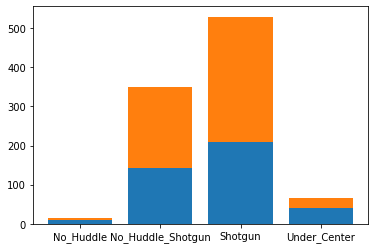

In [35]:
plt.bar(ARI_formations['Formation'],ARI_formations['Runs'])
plt.bar(ARI_formations['Formation'],ARI_formations['Passes'],bottom=ARI_formations['Runs'])

In [36]:
#running a simple regression to test
simple_lr_cols = PIT_2020[['DefenseTeam','Down','ToGo','Formation']]

In [37]:
simple_lr_cols = pd.get_dummies(simple_lr_cols,columns=['DefenseTeam','Down','Formation'])

In [38]:
X = simple_lr_cols
y = PIT_2020['PlayType']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [40]:
#running a log regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
lr.score(X_train, y_train)

0.7745901639344263

In [42]:
lr.score(X_test,y_test)

0.7755102040816326

In [43]:
#new model to check for best parameters
lr1 = LogisticRegression()

In [44]:
lr1_params = {
    'penalty':['l1','l2'],
    'C':[.01,.1,1.0,10,100],
    'solver':['lbfgs', 'liblinear'],
    'class_weight':['balanced',None],
    'max_iter':[10,50,100,500,1000]
}

In [45]:
#gridsearching for the best parameters
lr1_gridsearch = GridSearchCV(estimator=lr1,
                             param_grid=lr1_params,
                             cv=5)

In [46]:
lr1_gridsearch.fit(X_train, y_train)

/Users/reedhuston/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/reedhuston/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/reedhuston/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/reedhuston/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [10, 50, 100, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']})

In [47]:
lr1_gridsearch.best_score_

0.7746155996645234

In [48]:
lr1_gridsearch.best_params_

{'C': 0.1,
 'class_weight': None,
 'max_iter': 50,
 'penalty': 'l1',
 'solver': 'liblinear'}

## Generic 

In [49]:
#getting necessary columns and saving df
simp_all_run_pass = all_run_pass[['OffenseTeam','DefenseTeam','Down','ToGo','Formation','PlayType']]

In [50]:
simp_all_run_pass.columns = ['OffenseTeam','DefenseTeam','Down','ToGo','Formation','PlayType']

In [51]:
plays = pd.read_csv('Data/plays.csv')

In [52]:
def_pass_rank = plays['DefensePassRank']

In [53]:
def_run_rank = plays['DefenseRunRank']

In [54]:
simp_all_run_pass['DefenseRunRank'] = [i for i in def_run_rank]

<ipython-input-54-901b24ea7fc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simp_all_run_pass['DefenseRunRank'] = [i for i in def_run_rank]


In [55]:
simp_all_run_pass['DefensePassRank'] = [i for i in def_pass_rank]

<ipython-input-55-61746d71134f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simp_all_run_pass['DefensePassRank'] = [i for i in def_pass_rank]


In [56]:
simp_all_run_pass

,OffenseTeam,DefenseTeam,Down,ToGo,Formation,PlayType,DefenseRunRank,DefensePassRank
1,LV,MIA,3,19,SHOTGUN,0,16,25
4,MIN,NO,1,1,UNDER CENTER,0,5,5
5,TB,DET,2,6,NO HUDDLE SHOTGUN,1,14,32
6,TB,DET,1,10,NO HUDDLE SHOTGUN,1,14,32
7,ARI,SF,1,10,NO HUDDLE SHOTGUN,1,7,7
...,...,...,...,...,...,...,...,...
46182,ATL,SEA,1,6,NO HUDDLE SHOTGUN,1,4,13
46183,ATL,SEA,3,7,NO HUDDLE SHOTGUN,1,4,13
46184,ATL,SEA,2,9,NO HUDDLE SHOTGUN,1,4,13
46186,ATL,SEA,1,10,SHOTGUN,1,4,13


In [57]:
simp_all_run_pass.to_csv('plays.csv')

In [58]:
#creating dummies with the categorical variables
dummy_plays = pd.get_dummies(plays,columns=['Down','Formation'])

In [59]:
dummy_plays.drop(columns='Unnamed: 0',inplace=True)

In [60]:
dummy_plays

,OffenseTeam,DefenseTeam,ToGo,PlayType,DefensePassRank,DefenseRunRank,Down_1,Down_2,Down_3,Down_4,Formation_NO HUDDLE,Formation_NO HUDDLE SHOTGUN,Formation_SHOTGUN,Formation_UNDER CENTER
0,LV,MIA,19,0,25,16,0,0,1,0,0,0,1,0
1,MIN,NO,1,0,5,5,1,0,0,0,0,0,0,1
2,TB,DET,6,1,32,14,0,1,0,0,0,1,0,0
3,TB,DET,10,1,32,14,1,0,0,0,0,1,0,0
4,ARI,SF,10,1,7,7,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29385,ATL,SEA,6,1,13,4,1,0,0,0,0,1,0,0
29386,ATL,SEA,7,1,13,4,0,0,1,0,0,1,0,0
29387,ATL,SEA,9,1,13,4,0,1,0,0,0,1,0,0
29388,ATL,SEA,10,1,13,4,1,0,0,0,0,0,1,0


In [61]:
#filtering through all 32 teams and running 7 models for each team
#compiling accuracy scores of models and comparing them
run_rates = []
pass_rates = []
lr_accuracy_scores = []
to_go_impact = []
def_pass_rank_impact = []
def_run_rank_impact = []
first_down_impact = []
second_down_impact = []
third_down_impact = []
fourth_down_impact = []
no_huddle_center_impact = []
no_huddle_shotgun_impact = []
shotgun_impact = []
center_impact = []
knc_accuracy_scores = []
dtc_accuracy_scores = []
bc_accuracy_scores = []
rfc_accuracy_scores = []
adc_accuracy_scores = []
svc_accuracy_scores = []

for name in set(dummy_plays['OffenseTeam']):
    team_data = dummy_plays[dummy_plays['OffenseTeam'] == name]
    X = team_data.drop(columns=['OffenseTeam','DefenseTeam','PlayType'])
    y = team_data['PlayType']
    run_rate = team_data['PlayType'].value_counts(normalize=True).sort_values(ascending=True)[0]
    run_rates.append(run_rate)
    pass_rate = team_data['PlayType'].value_counts(normalize=True).sort_values(ascending=True)[1]
    pass_rates.append(pass_rate)
    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    lr = LogisticRegression(max_iter=500)
    lr.fit(X_train_sc, y_train)
    lr_accuracy_scores.append(lr.score(X_test_sc,y_test))
    to_go_impact.append(lr.coef_[0][0])
    def_pass_rank_impact.append(lr.coef_[0][1])
    def_run_rank_impact.append(lr.coef_[0][2])
    first_down_impact.append(lr.coef_[0][3])
    second_down_impact.append(lr.coef_[0][4])
    third_down_impact.append(lr.coef_[0][5])
    fourth_down_impact.append(lr.coef_[0][6])
    no_huddle_center_impact.append(lr.coef_[0][7])
    no_huddle_shotgun_impact.append(lr.coef_[0][8])
    shotgun_impact.append(lr.coef_[0][9])
    center_impact.append(lr.coef_[0][10])
    knc = KNeighborsClassifier()
    knc.fit(X_train_sc,y_train)
    knc_accuracy_scores.append(knc.score(X_test_sc,y_test))
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train_sc,y_train)
    dtc_accuracy_scores.append(dtc.score(X_test_sc,y_test))
    bc = BaggingClassifier()
    bc.fit(X_train_sc,y_train)
    bc_accuracy_scores.append(bc.score(X_test_sc,y_test))
    rfc = RandomForestClassifier()
    rfc.fit(X_train_sc,y_train)
    rfc_accuracy_scores.append(rfc.score(X_test_sc,y_test))
    adc = AdaBoostClassifier()
    adc.fit(X_train_sc,y_train)
    adc_accuracy_scores.append(adc.score(X_test_sc,y_test))
    svc = SVC()
    svc.fit(X_train_sc,y_train)
    svc_accuracy_scores.append(svc.score(X_test_sc,y_test))
    
acc_score_df = pd.DataFrame(set(dummy_plays['OffenseTeam']))
acc_score_df['lr_Accuracy_Score'] = lr_accuracy_scores
acc_score_df['knc_Accuracy_Score'] = knc_accuracy_scores
acc_score_df['dtc_Accuracy_Score'] = dtc_accuracy_scores
acc_score_df['bc_Accuracy_Score'] = bc_accuracy_scores
acc_score_df['rfc_Accuracy_Score'] = rfc_accuracy_scores
acc_score_df['adc_Accuracy_Score'] = adc_accuracy_scores
acc_score_df['svc_Accuracy_Score'] = svc_accuracy_scores
acc_score_df.columns = ['Team','lr_Accuracy_Score','knc_Accuracy_Score','dtc_Accuracy_Score','bc_Accuracy_Score','rfc_Accuracy_Score','adc_Accuracy_Score','svc_Accuracy_Score']
acc_score_df['to_go_impact'] = to_go_impact
acc_score_df['def_pass_rank_impact'] = def_pass_rank_impact
acc_score_df['def_run_rank_impact'] = def_run_rank_impact
acc_score_df['first_down_impact'] = first_down_impact
acc_score_df['second_down_impact'] = second_down_impact
acc_score_df['third_down_impact'] = third_down_impact
acc_score_df['fourth_down_impact'] = fourth_down_impact
acc_score_df['no_huddle_center_impact'] = no_huddle_center_impact
acc_score_df['no_huddle_shotgun_impact'] = no_huddle_shotgun_impact
acc_score_df['shotgun_impact'] = shotgun_impact
acc_score_df['center_impact'] = center_impact
acc_score_df['Run_Rate'] = run_rates
acc_score_df['Pass_Rate'] = pass_rates
team_scores = acc_score_df.sort_values(by='lr_Accuracy_Score')

In [62]:
team_scores['svc_Accuracy_Score'].sum()/32

0.7207280813530712

In [63]:
sum(team_scores['lr_Accuracy_Score'])

23.041981971898245

In [64]:
#comparing model to the baseline

In [65]:
team_scores['Model_over_base'] = team_scores['lr_Accuracy_Score'] - team_scores['Pass_Rate']

In [66]:
team_scores.loc[team_scores['Run_Rate']>.5]

,Team,lr_Accuracy_Score,knc_Accuracy_Score,dtc_Accuracy_Score,bc_Accuracy_Score,rfc_Accuracy_Score,adc_Accuracy_Score,svc_Accuracy_Score,to_go_impact,def_pass_rank_impact,...,second_down_impact,third_down_impact,fourth_down_impact,no_huddle_center_impact,no_huddle_shotgun_impact,shotgun_impact,center_impact,Run_Rate,Pass_Rate,Model_over_base
17,BAL,0.666667,0.652778,0.662037,0.634259,0.643519,0.638889,0.662037,0.857143,0.356373,...,0.112916,0.396554,0.155200,0.210416,0.351377,-0.115782,-0.195831,0.547454,0.452546,0.214120
31,NE,0.677273,0.631818,0.659091,0.654545,0.690909,0.672727,0.659091,0.771655,0.075726,...,0.101552,0.233191,0.054437,-0.007166,0.173983,0.343623,-0.436430,0.515945,0.484055,0.193218


In [67]:
team_scores.loc[team_scores['Run_Rate']>.5]['lr_Accuracy_Score']-team_scores.loc[team_scores['Run_Rate']>.5]['Run_Rate']

17    0.119213
31    0.161327
dtype: float64

In [68]:
team_scores['Model_over_base'][16] = 0.119213
team_scores['Model_over_base'][28] = 0.161327

<ipython-input-68-e2d9fca4c3f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_scores['Model_over_base'][16] = 0.119213
<ipython-input-68-e2d9fca4c3f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_scores['Model_over_base'][28] = 0.161327


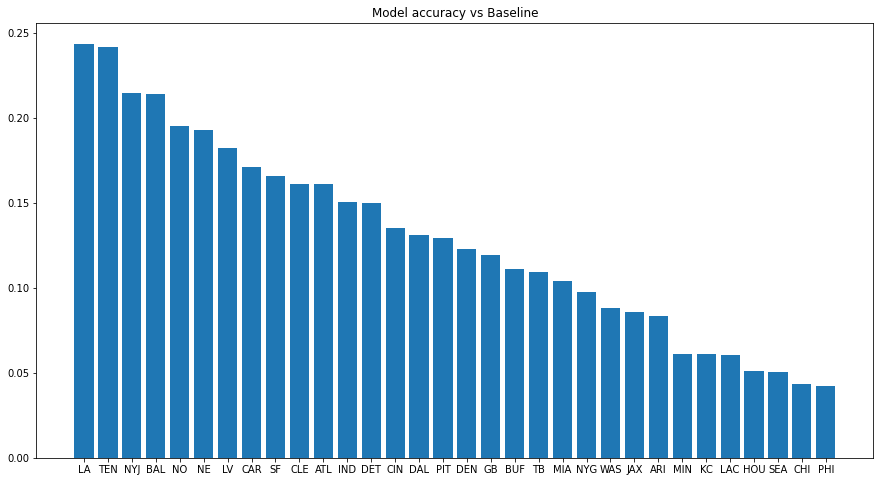

In [69]:
plt.figure(figsize=(15,8))
plt.bar(team_scores.sort_values('Model_over_base',ascending=False)['Team'],team_scores.sort_values('Model_over_base',ascending=False)['Model_over_base'])
plt.title('Model accuracy vs Baseline')
plt.savefig('Model accuracy vs Baseline')

In [70]:
#fitting a logistic regression on all 32 teams and comparing the coefficients of each model
run_rates = []
pass_rates = []
lr_accuracy_scores = []
to_go_impact = []
def_pass_rank_impact = []
def_run_rank_impact = []
first_down_impact = []
second_down_impact = []
third_down_impact = []
fourth_down_impact = []
no_huddle_center_impact = []
no_huddle_shotgun_impact = []
shotgun_impact = []
center_impact = []

for name in set(dummy_plays['OffenseTeam']):
    team_data = dummy_plays[dummy_plays['OffenseTeam'] == name]
    X = team_data.drop(columns=['OffenseTeam','DefenseTeam','PlayType'])
    y = team_data['PlayType']
    run_rate = team_data['PlayType'].value_counts(normalize=True).sort_values(ascending=True)[0]
    run_rates.append(run_rate)
    pass_rate = team_data['PlayType'].value_counts(normalize=True).sort_values(ascending=True)[1]
    pass_rates.append(pass_rate)
    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    lr = LogisticRegression(random_state=42,max_iter=50)
    lr.fit(X_train_sc, y_train)
    lr_accuracy_scores.append(lr.score(X_test_sc,y_test))
    to_go_impact.append(np.exp(lr.coef_[0][0]))
    def_pass_rank_impact.append(np.exp(lr.coef_[0][1]))
    def_run_rank_impact.append(np.exp(lr.coef_[0][2]))
    first_down_impact.append(np.exp(lr.coef_[0][3]))
    second_down_impact.append(np.exp(lr.coef_[0][4]))
    third_down_impact.append(np.exp(lr.coef_[0][5]))
    fourth_down_impact.append(np.exp(lr.coef_[0][6]))
    no_huddle_center_impact.append(np.exp(lr.coef_[0][7]))
    no_huddle_shotgun_impact.append(np.exp(lr.coef_[0][8]))
    shotgun_impact.append(np.exp(lr.coef_[0][9]))
    center_impact.append(np.exp(lr.coef_[0][10]))
    
acc_score_df = pd.DataFrame(set(dummy_plays['OffenseTeam']))
acc_score_df['lr_Accuracy_Score'] = lr_accuracy_scores
acc_score_df.columns = ['Team','lr_Accuracy_Score']
acc_score_df['to_go_impact'] = to_go_impact
acc_score_df['def_pass_rank_impact'] = def_pass_rank_impact
acc_score_df['def_run_rank_impact'] = def_run_rank_impact
acc_score_df['first_down_impact'] = first_down_impact
acc_score_df['second_down_impact'] = second_down_impact
acc_score_df['third_down_impact'] = third_down_impact
acc_score_df['fourth_down_impact'] = fourth_down_impact
acc_score_df['no_huddle_center_impact'] = no_huddle_center_impact
acc_score_df['no_huddle_shotgun_impact'] = no_huddle_shotgun_impact
acc_score_df['shotgun_impact'] = shotgun_impact
acc_score_df['center_impact'] = center_impact
acc_score_df['Run_Rate'] = run_rates
acc_score_df['Pass_Rate'] = pass_rates
team_scores = acc_score_df.sort_values(by='lr_Accuracy_Score')

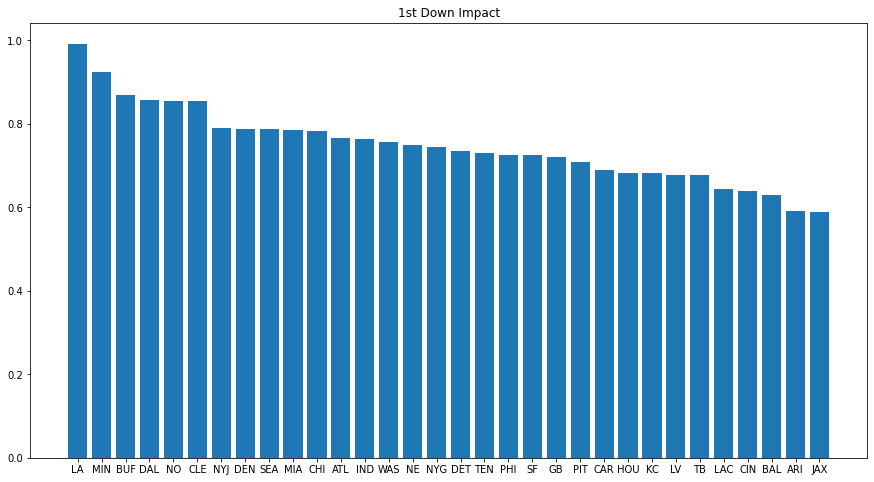

In [71]:
plt.figure(figsize=(15,8))
plt.bar(team_scores.sort_values('first_down_impact',ascending=False)['Team'],team_scores.sort_values('first_down_impact',ascending=False)['first_down_impact'])
plt.title('1st Down Impact')
plt.savefig('1st Down Impact')

In [72]:
team_scores['lr_Accuracy_Score'].sum()

23.041981971898245